By: Mostafa Mahmoud Hassan.
Data Science and business Analytics Internship [septamper 2022] .
Task 3: Exploratory Data Analysis - Terrorism.
dataset link :https://bit.ly/2TK5Xn5


In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [6]:
import chardet
with open(r'E:\CV\the sparks foundation intern\globalterrorismdb_0718dist.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [7]:
data=pd.read_csv(r'E:\CV\the sparks foundation intern\globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [12]:
data.shape

(181691, 135)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [14]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [16]:
data.shape[0]-data['approxdate'].isnull().sum()

9239

In [17]:
data.duplicated().sum()

0

In [18]:
for i in data.columns :
    print(i)

eventid
iyear
imonth
iday
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
gsubname3
motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
weapsubtype3
weapsubtype3_txt
weaptype4
weapt

In [19]:
#Choose the columns that we will work on
df = data[["iyear", "imonth", "iday", "country_txt", "region_txt", "provstate", "city", "latitude", "longitude", "location", "summary", "attacktype1_txt", "targtype1_txt", "gname", "motive", "weaptype1_txt", "nkill", "nwound", "addnotes"]]
df

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,Armed Assault,Military,Al-Shabaab,NaN,Firearms,1.0,2.0,NaN
181687,2017,12,31,Syria,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,Bombing/Explosion,Military,Muslim extremists,NaN,Explosives,2.0,7.0,NaN
181688,2017,12,31,Philippines,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,Facility/Infrastructure Attack,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),NaN,Incendiary,0.0,0.0,NaN
181689,2017,12,31,India,South Asia,Manipur,Imphal,24.798346,93.940430,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,Bombing/Explosion,Government (General),Unknown,NaN,Explosives,0.0,0.0,NaN


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   imonth           181691 non-null  int64  
 2   iday             181691 non-null  int64  
 3   country_txt      181691 non-null  object 
 4   region_txt       181691 non-null  object 
 5   provstate        181270 non-null  object 
 6   city             181257 non-null  object 
 7   latitude         177135 non-null  float64
 8   longitude        177134 non-null  float64
 9   location         55495 non-null   object 
 10  summary          115562 non-null  object 
 11  attacktype1_txt  181691 non-null  object 
 12  targtype1_txt    181691 non-null  object 
 13  gname            181691 non-null  object 
 14  motive           50561 non-null   object 
 15  weaptype1_txt    181691 non-null  object 
 16  nkill            171378 non-null  floa

In [22]:
df.describe(include='all')

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
count,181691.000000,181691.000000,181691.000000,181691,181691,181270,181257,177135.000000,1.771340e+05,55495,115562,181691,181691,181691,50561,181691,171378.000000,165380.000000,28289
unique,NaN,NaN,NaN,205,12,2855,36674,NaN,NaN,44109,112492,9,22,3537,14490,12,NaN,NaN,15429
top,NaN,NaN,NaN,Iraq,Middle East & North Africa,Baghdad,Unknown,NaN,NaN,"The attack took place in Baghdad, Baghdad, Iraq.","09/00/2016: Sometime between September 18, 201...",Bombing/Explosion,Private Citizens & Property,Unknown,Unknown,Explosives,NaN,NaN,Casualty numbers for this incident conflict ac...
freq,NaN,NaN,NaN,24636,50474,7645,9775,NaN,NaN,142,100,88255,43511,82782,14889,92426,NaN,NaN,1607
mean,2002.638997,6.467277,15.505644,NaN,NaN,NaN,NaN,23.498343,-4.586957e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.403272,3.167668,NaN
std,13.259430,3.388303,8.814045,NaN,NaN,NaN,NaN,18.569242,2.047790e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.545741,35.949392,NaN
min,1970.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,-53.154613,-8.618590e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
25%,1991.000000,4.000000,8.000000,NaN,NaN,NaN,NaN,11.510046,4.545640e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
50%,2009.000000,6.000000,15.000000,NaN,NaN,NaN,NaN,31.467463,4.324651e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
75%,2014.000000,9.000000,23.000000,NaN,NaN,NaN,NaN,34.685087,6.871033e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN


In [166]:
df.rename(columns = {"iyear" : "Year", "imonth" : "Month", "iday" : "Day", "country_txt" : "Country", "region_txt" : "Region", "provstate" : "Proviance/State", "city" : "City", "latitude" : "Latitude", "longitude" : "Longitude", "location" : "Location", "summary" : "Summary", "attacktype1_txt" : "Attack Type", "targtype1_txt"  :"Target Type", "gname" : "Group Name", "motive" : "Motive", "weaptype1_txt" : "Weapon Type", "nkill" : "Killed", "nwound" : "Wounded", "addnotes" : "Add Notes"}, inplace = True)
df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,Day,Country,Region,Proviance/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes,Casualty
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN,1.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN,1.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,0.0,0.0,NaN,0.0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,Armed Assault,Military,Al-Shabaab,NaN,Firearms,1.0,2.0,NaN,3.0
181687,2017,12,31,Syria,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,Bombing/Explosion,Military,Muslim extremists,NaN,Explosives,2.0,7.0,NaN,9.0
181688,2017,12,31,Philippines,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,Facility/Infrastructure Attack,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),NaN,Incendiary,0.0,0.0,NaN,0.0
181689,2017,12,31,India,South Asia,Manipur,Imphal,24.798346,93.940430,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,Bombing/Explosion,Government (General),Unknown,NaN,Explosives,0.0,0.0,NaN,0.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             181691 non-null  int64  
 1   Month            181691 non-null  int64  
 2   Day              181691 non-null  int64  
 3   Country          181691 non-null  object 
 4   Region           181691 non-null  object 
 5   Proviance/State  181270 non-null  object 
 6   City             181257 non-null  object 
 7   Latitude         177135 non-null  float64
 8   Longitude        177134 non-null  float64
 9   Location         55495 non-null   object 
 10  Summary          115562 non-null  object 
 11  Attack Type      181691 non-null  object 
 12  Target Type      181691 non-null  object 
 13  Group Name       181691 non-null  object 
 14  Motive           50561 non-null   object 
 15  Weapon Type      181691 non-null  object 
 16  Killed           171378 non-null  floa

In [25]:
df.shape

(181691, 19)

In [26]:
df.isnull().sum()

Year                    0
Month                   0
Day                     0
Country                 0
Region                  0
Proviance/State       421
City                  434
Latitude             4556
Longitude            4557
Location           126196
Summary             66129
Attack Type             0
Target Type             0
Group Name              0
Motive             131130
Weapon Type             0
Killed              10313
Wounded             16311
Add Notes          153402
dtype: int64

In [27]:
df.duplicated().sum()


11317

In [28]:
df.drop_duplicates()

,Year,Month,Day,Country,Region,Proviance/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,Armed Assault,Military,Al-Shabaab,NaN,Firearms,1.0,2.0,NaN
181687,2017,12,31,Syria,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,Bombing/Explosion,Military,Muslim extremists,NaN,Explosives,2.0,7.0,NaN
181688,2017,12,31,Philippines,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,Facility/Infrastructure Attack,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),NaN,Incendiary,0.0,0.0,NaN
181689,2017,12,31,India,South Asia,Manipur,Imphal,24.798346,93.940430,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,Bombing/Explosion,Government (General),Unknown,NaN,Explosives,0.0,0.0,NaN


In [30]:
#Filling blanks

df["Killed"] = df["Killed"].fillna(0)
df["Wounded"] = df["Wounded"].fillna(0)
df["Casualty"] = df["Killed"] + df["Wounded"]

C:\Users\HP\AppData\Local\Temp/ipykernel_17812/1557429921.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Killed"] = df["Killed"].fillna(0)
C:\Users\HP\AppData\Local\Temp/ipykernel_17812/1557429921.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Wounded"] = df["Wounded"].fillna(0)
C:\Users\HP\AppData\Local\Temp/ipykernel_17812/1557429921.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [32]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


The data we have is from 1970 to 2017
max no. of killed is 1570
max no. of wounded is 8191
max no. of casualty is 9574

# To know how many attacks per year

In [280]:

YearAtck=df["Year"].value_counts().sort_index().to_frame().reset_index().rename(columns = {"index" : "Year", "Year" : "Attacks"}).set_index("Year")
#YearAtck

In [43]:
YearAtck.describe()

,Attacks
count,47.000000
mean,3865.765957
std,3836.943826
min,471.000000
25%,1364.000000
50%,2870.000000
75%,4503.500000
max,16903.000000


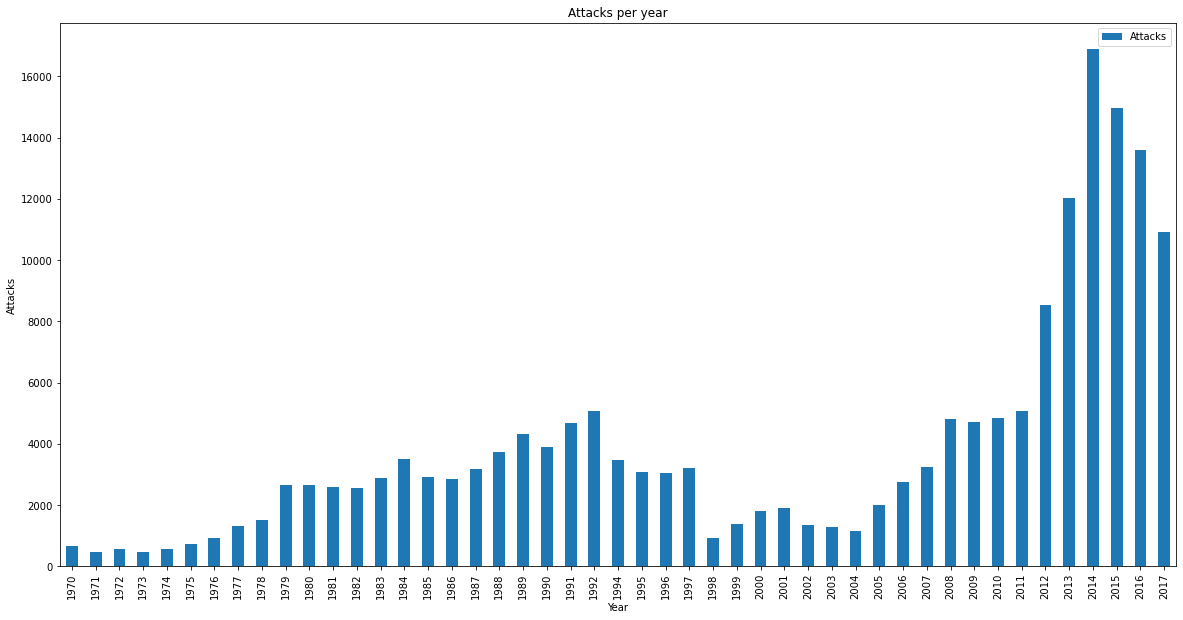

In [56]:
YearAtck.plot.bar(figsize=(20,10))
plt.title("Attacks per year")
plt.xlabel("Year")
plt.ylabel("Attacks")
plt.show()

2014 is the year with the most attacks with 16903 attacks
1971 is the year with the lowest attacks with 471 attacks

#  To know how many Casualty per year

In [279]:
Casualty_per_Year=df.groupby('Year')['Casualty'].sum().to_frame()
#Casualty_per_Year

In [53]:
Casualty_per_Year.describe()

,Casualty
count,47.000000
mean,19909.297872
std,20602.941833
min,255.000000
25%,8333.000000
50%,13691.000000
75%,23339.500000
max,85618.000000


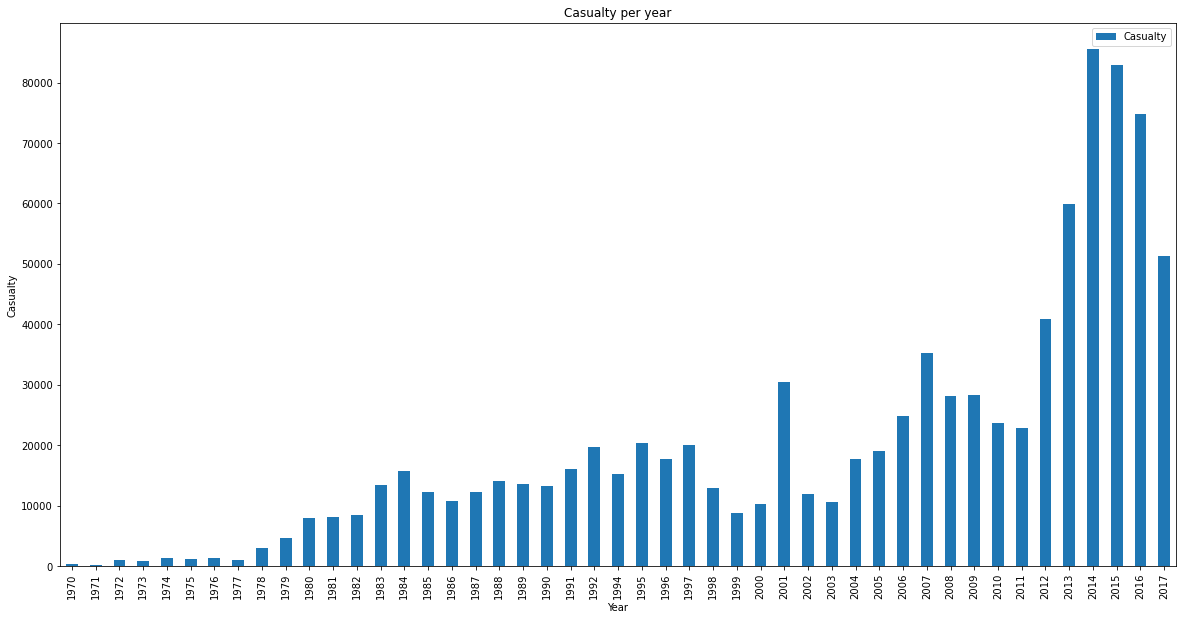

In [55]:
Casualty_per_Year.plot.bar(figsize=(20,10))
plt.title("Casualty per year")
plt.xlabel("Year")
plt.ylabel("Casualty")
plt.show()

2014 is the year with the most attacks with 85618 Casualties
1971 is the year with the lowest attacks with 255 Casualties

#  To know how many attack per year at each region

In [76]:
RegAtck = pd.crosstab(df.Year, df.Region)
Region_attack = pd.crosstab(df.Year, df.Region,margins=True)
Region_attack


Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe,All
Year,,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50,651
1971,1,5,0,1,5,55,247,24,0,6,2,125,471
1972,8,3,0,0,1,53,73,33,1,16,4,376,568
1973,1,6,0,2,1,19,64,83,1,2,4,290,473
1974,1,11,0,4,2,42,111,81,2,3,7,317,581
1975,0,9,0,12,0,44,159,55,4,7,12,438,740
1976,0,45,0,2,0,55,125,91,4,12,11,578,923
1977,0,24,0,4,2,211,149,119,2,8,29,771,1319
1978,2,199,0,35,2,128,117,222,2,44,46,729,1526


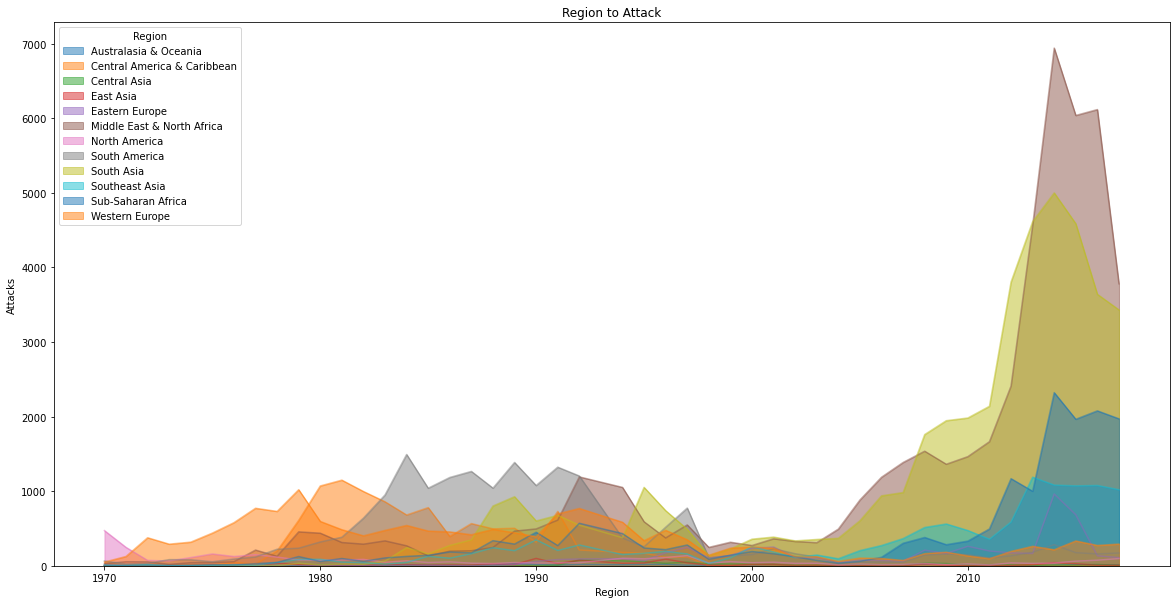

In [245]:
#Plot Attack Region Data

RegAtck.plot(kind = "area", figsize = (20,10), stacked = False)
plt.title("Region to Attack")
plt.xlabel("Region")
plt.ylabel("Attacks")
plt.show()

#  To know how many attack last 10 years at each region (2010:2017)

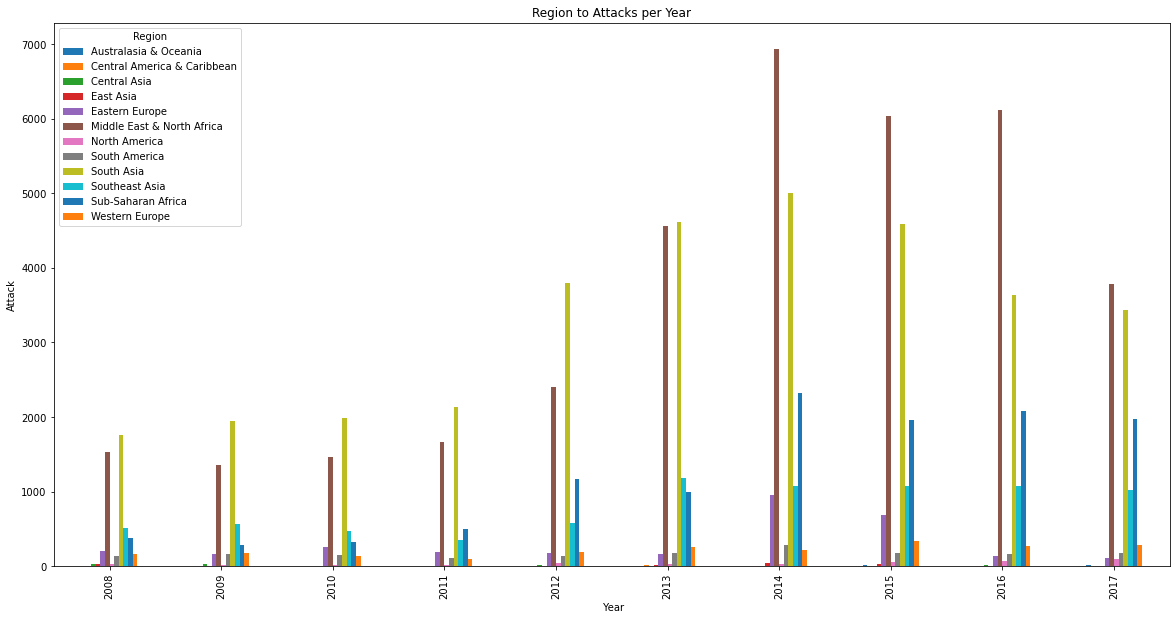

In [244]:
RegAtck[-10:].plot.bar(figsize=(20,10))
plt.title("Region to Attacks per Year")
plt.xlabel(" Year")
plt.ylabel("Attack")
plt.show()

In [100]:
x=df['Year']>2007
last10years_Region_attack = pd.crosstab(x, df.Region)
last10years_Region_attack


Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
False,226,10305,416,659,2083,14612,3031,17316,12084,4555,5563,14500
True,56,39,147,143,3061,35862,425,1662,32890,7930,11987,2139


Middle East & North Africa is the most region have attacks since 2008 to 2017 then South Asia
Central America & Caribbean is the least region have attacks since 2008 to 2017 then Australasia & Oceania

#  To know how many attack first 10 years at each region (1970:1979)

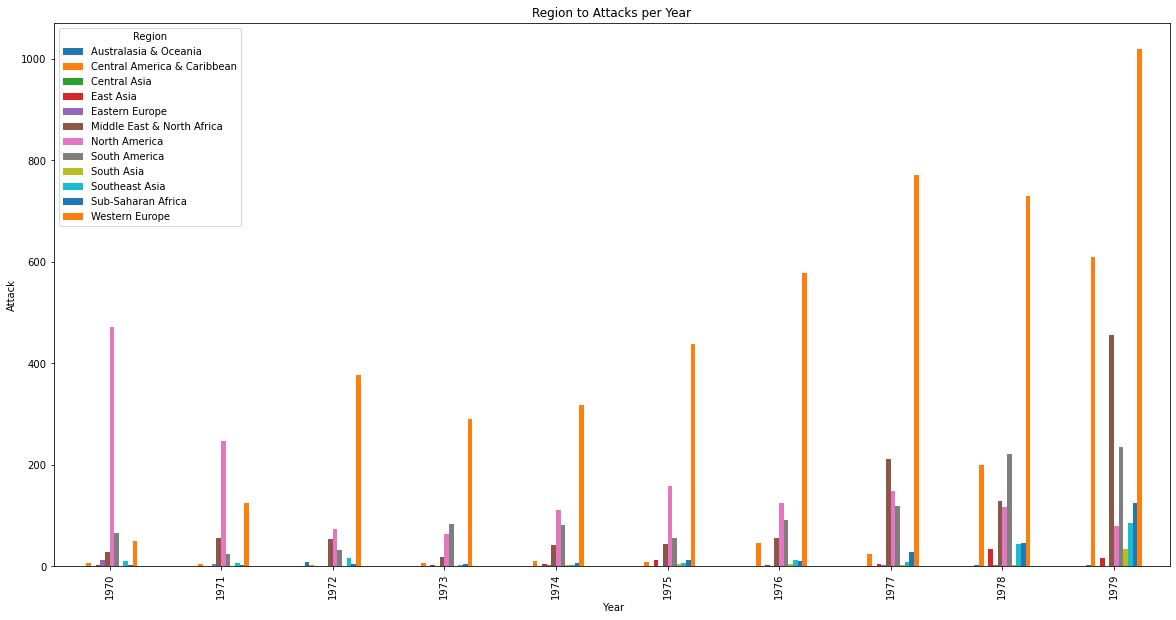

In [243]:


RegAtck[:10].plot.bar(figsize=(20,10))
plt.title("Region to Attacks per Year")
plt.xlabel(" Year")
plt.ylabel("Attack")
plt.show()

In [97]:
x=df['Year']<1980
first10years_Region_attack = pd.crosstab(x, df.Region)
first10years_Region_attack

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
False,266,9426,563,724,5118,49384,1860,17969,44923,12291,17308,11945
True,16,918,0,78,26,1090,1596,1009,51,194,242,4694


In [ ]:
Western Europe is the most region have attacks since 1970 to 1979 then North America
Central Asia haven't any attacks at 1970 to 1979 then Australasia & Oceania

ALL Attacks per each region

In [142]:
all_attacks=Region_attack[-1:].transpose().sort_values(by='All',ascending =False)
All_attacks=all_attacks[1:]
All_attacks

Year,All
Region,
Middle East & North Africa,50474
South Asia,44974
South America,18978
Sub-Saharan Africa,17550
Western Europe,16639
Southeast Asia,12485
Central America & Caribbean,10344
Eastern Europe,5144
North America,3456


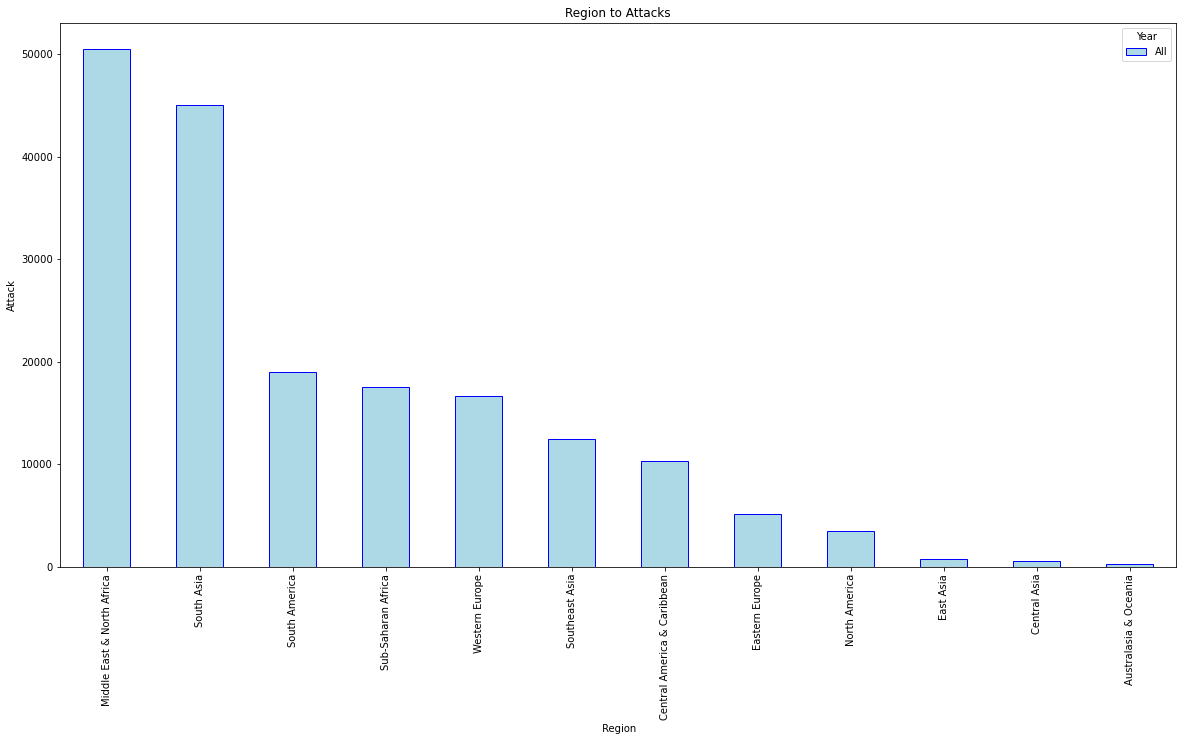

In [241]:
All_attacks.plot.bar(figsize=(20,10),color='lightblue',edgecolor='blue')
plt.title("Region to Attacks")
plt.xlabel(" Region")
plt.ylabel("Attack")
plt.show()

Middle East & North Africa is the most region have attacks then South Asia
Australasia & Oceania is the least region have attacks

In [221]:
Casualty_per_year=df.groupby('Year')['Casualty'].sum().to_frame().reset_index()
Casualty_per_year

,Year,Casualty
0,1970,386.0
1,1971,255.0
2,1972,975.0
3,1973,865.0
4,1974,1404.0
5,1975,1234.0
6,1976,1430.0
7,1977,974.0
8,1978,3059.0
9,1979,4606.0


In [183]:
px.bar(data_frame=Casualty_per_year,x='Year',y='Casualty',color='Casualty',template='plotly_dark')

In [222]:
Casualty_per_month=df.groupby('Month')['Casualty'].sum().to_frame().reset_index()
px.bar(data_frame=Casualty_per_month,x='Month',y='Casualty',color='Casualty',template='plotly_dark')

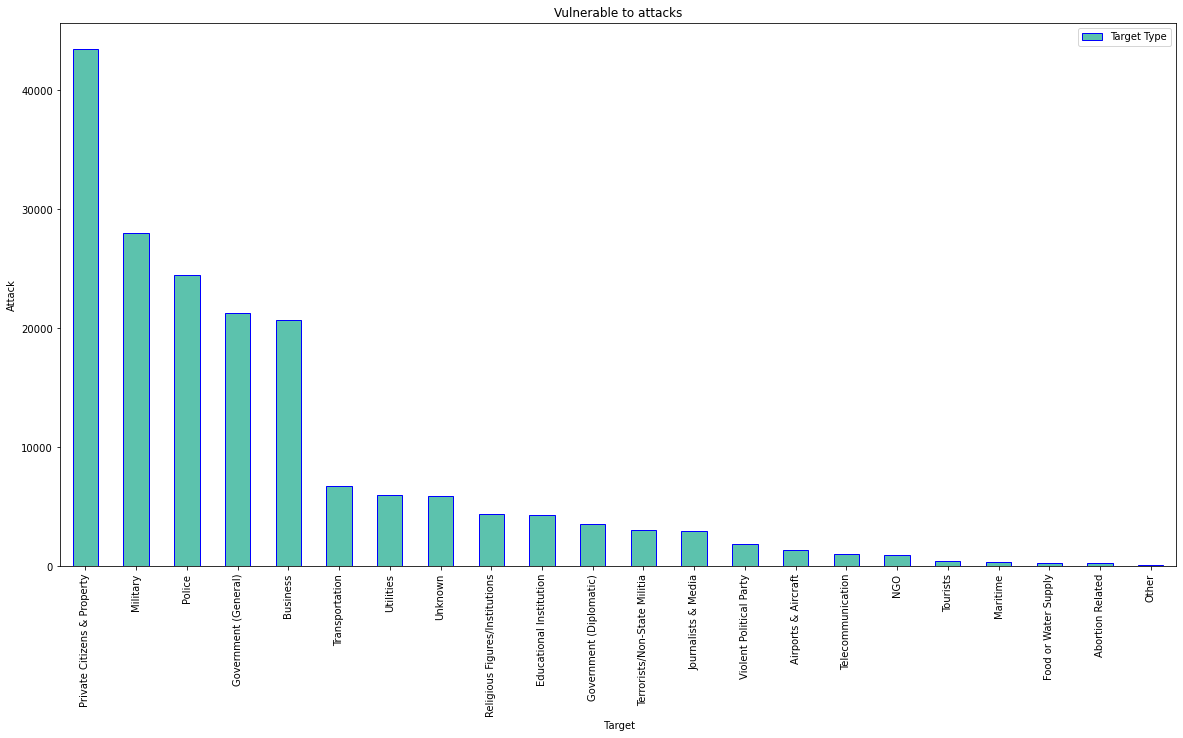

In [240]:
df['Target Type'].value_counts().to_frame().plot.bar(figsize=(20,10),color=(0.2, 0.7, 0.6, 0.8),edgecolor='blue')

plt.title("Vulnerable to attacks")
plt.xlabel(" Target")
plt.ylabel("Attack")
plt.show()

Private Citizens & property are the most vulnerable to attacks

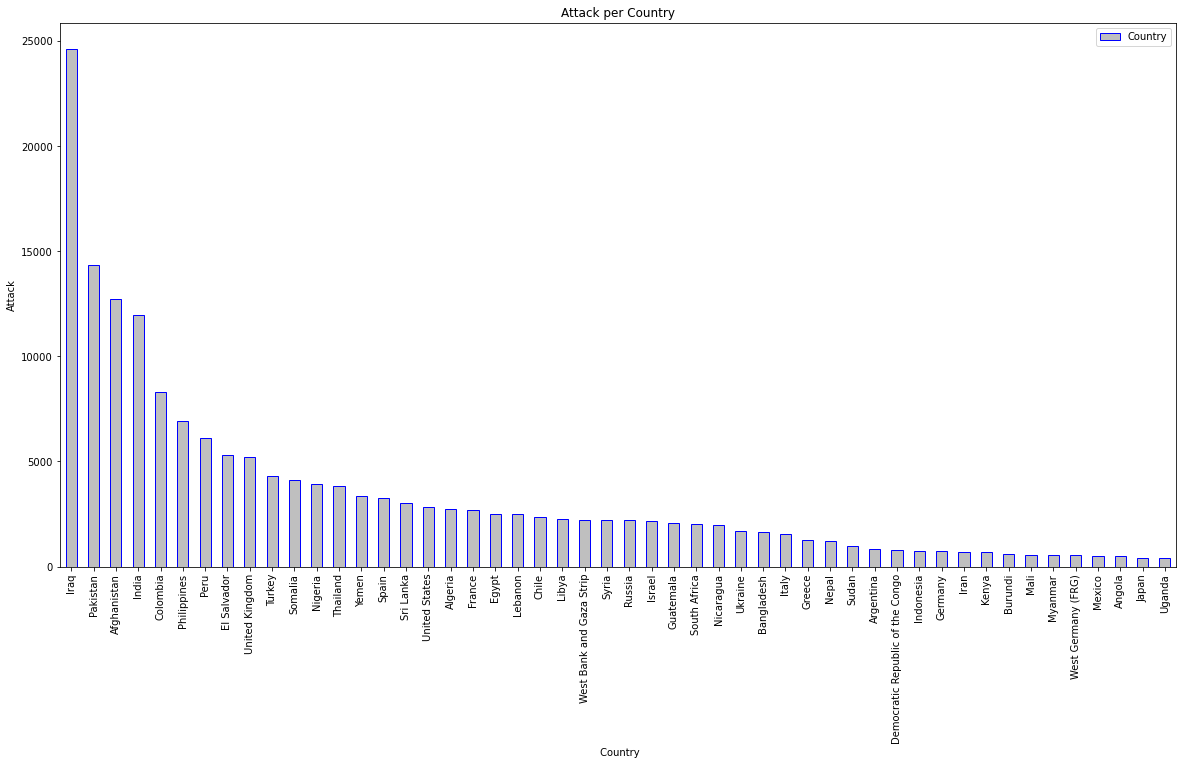

In [239]:
df['Country'].value_counts().to_frame().head(50).plot.bar(figsize=(20,10),color=(0.5,0.5,0.5,0.5),edgecolor='blue')
plt.title("Attack per Country")
plt.xlabel(" Country")
plt.ylabel("Attack")
plt.show()

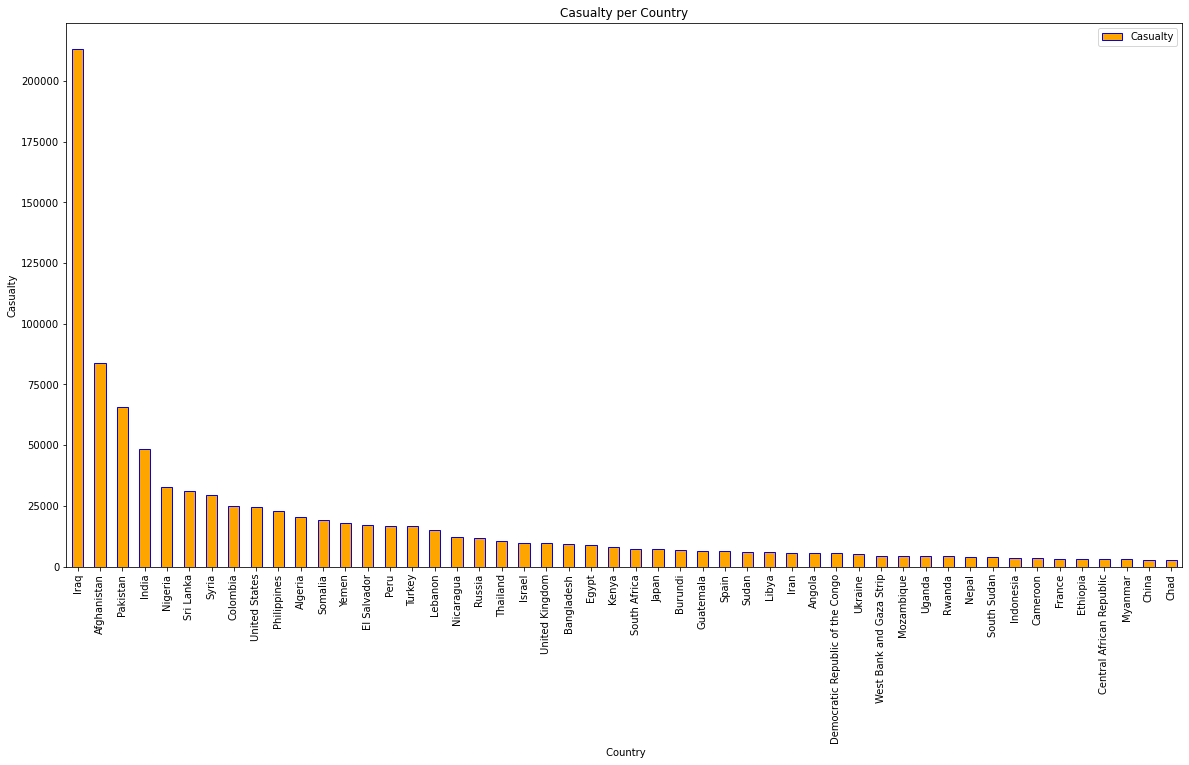

In [238]:
df.groupby('Country')['Casualty'].sum().to_frame().sort_values(by='Casualty',ascending=False).head(50).plot.bar(figsize=(20,10),color='orange',edgecolor='blue')
plt.title("Casualty per Country")
plt.xlabel(" Country")
plt.ylabel("Casualty")
plt.show()

Iraq is the most country attacked and have Casualties

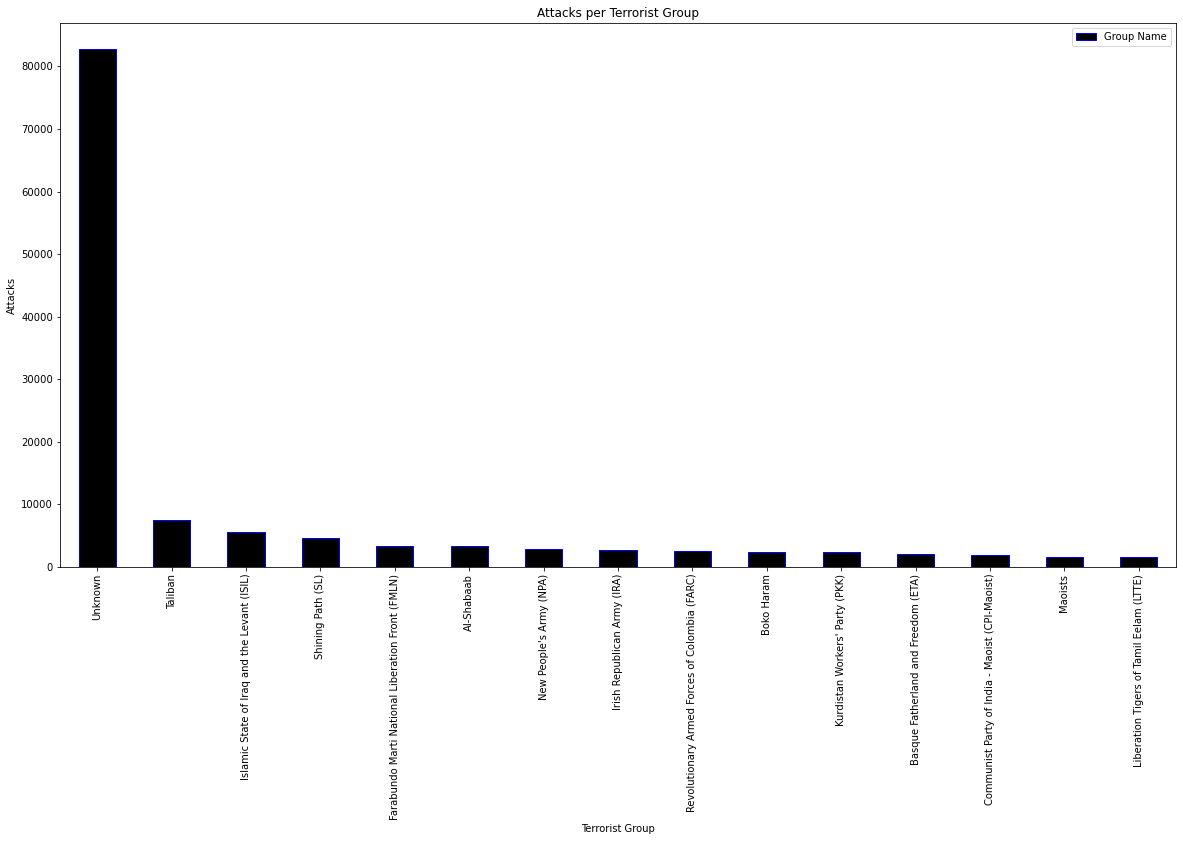

In [236]:
df['Group Name'].value_counts().to_frame().head(15).plot.bar(figsize=(20,10),color='black',edgecolor='blue')
plt.title("Attacks per Terrorist Group")
plt.xlabel("Terrorist Group")
plt.ylabel("Attacks")
plt.show()

Most of the terrorist operations were carried out by unknown group

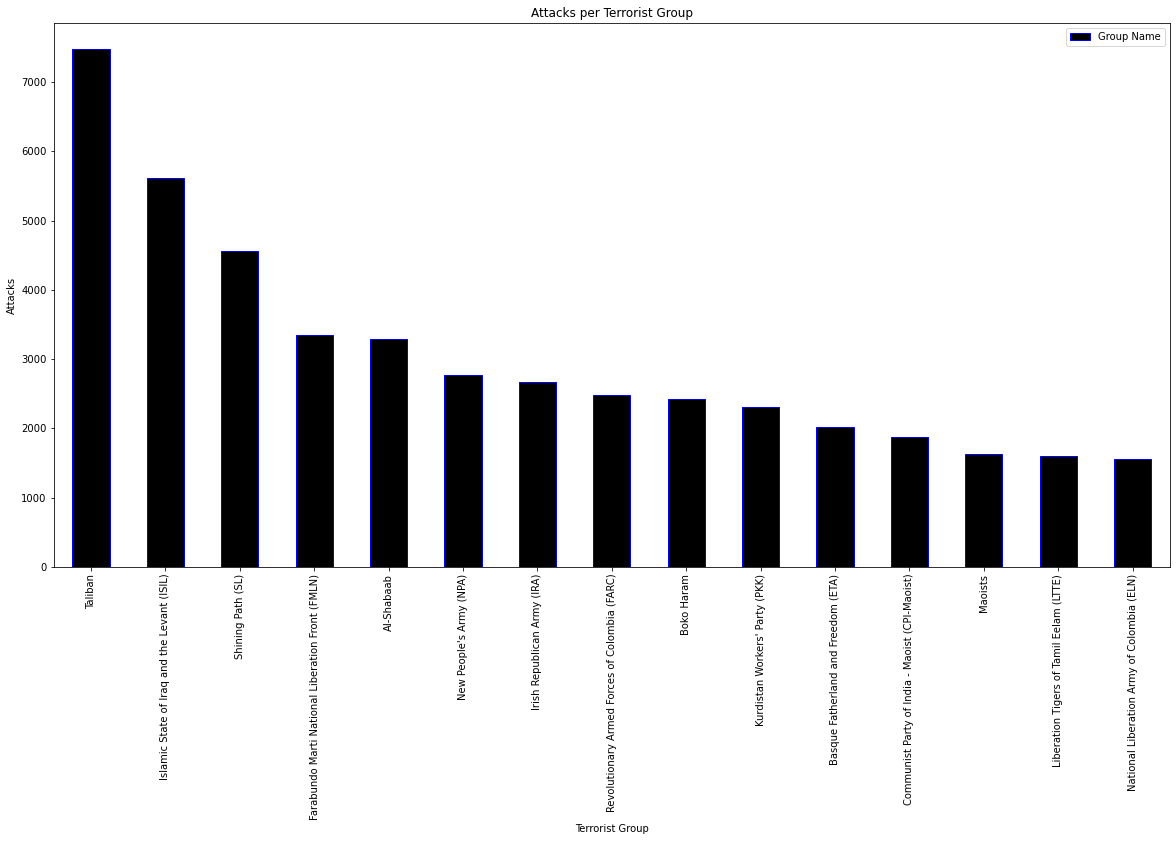

In [235]:
df['Group Name'].value_counts()[1:].to_frame().head(15).plot.bar(figsize=(20,10),color='black',edgecolor='blue')
plt.title("Attacks per Terrorist Group")
plt.xlabel("Terrorist Group")
plt.ylabel("Attacks")
plt.show()

The Taliban group are the most attacked terrorists

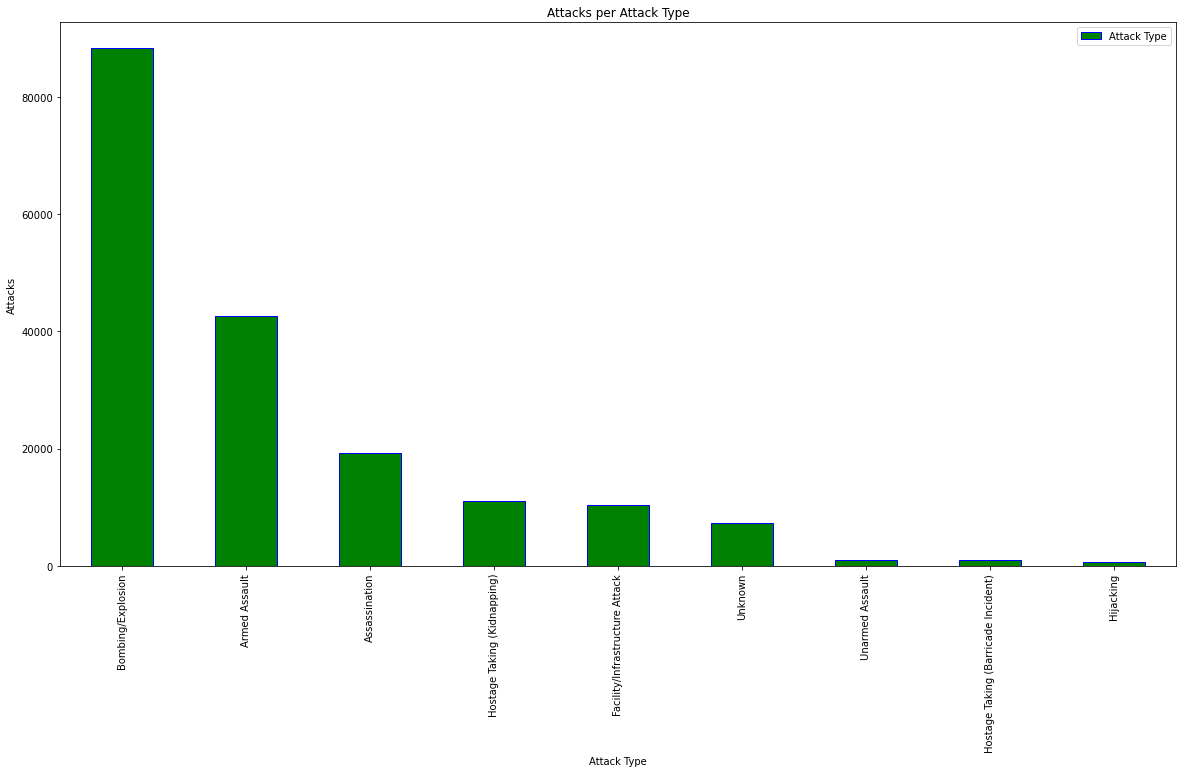

In [248]:
df['Attack Type'].value_counts().to_frame().head(15).plot.bar(figsize=(20,10),color='green',edgecolor='blue')
plt.title("Attacks per Attack Type")
plt.xlabel("Attack Type")
plt.ylabel("Attacks")
plt.show()

The most attacks were Bombing/Explosion .
The least attacks were Hijacking.


<function matplotlib.pyplot.show(close=None, block=None)>

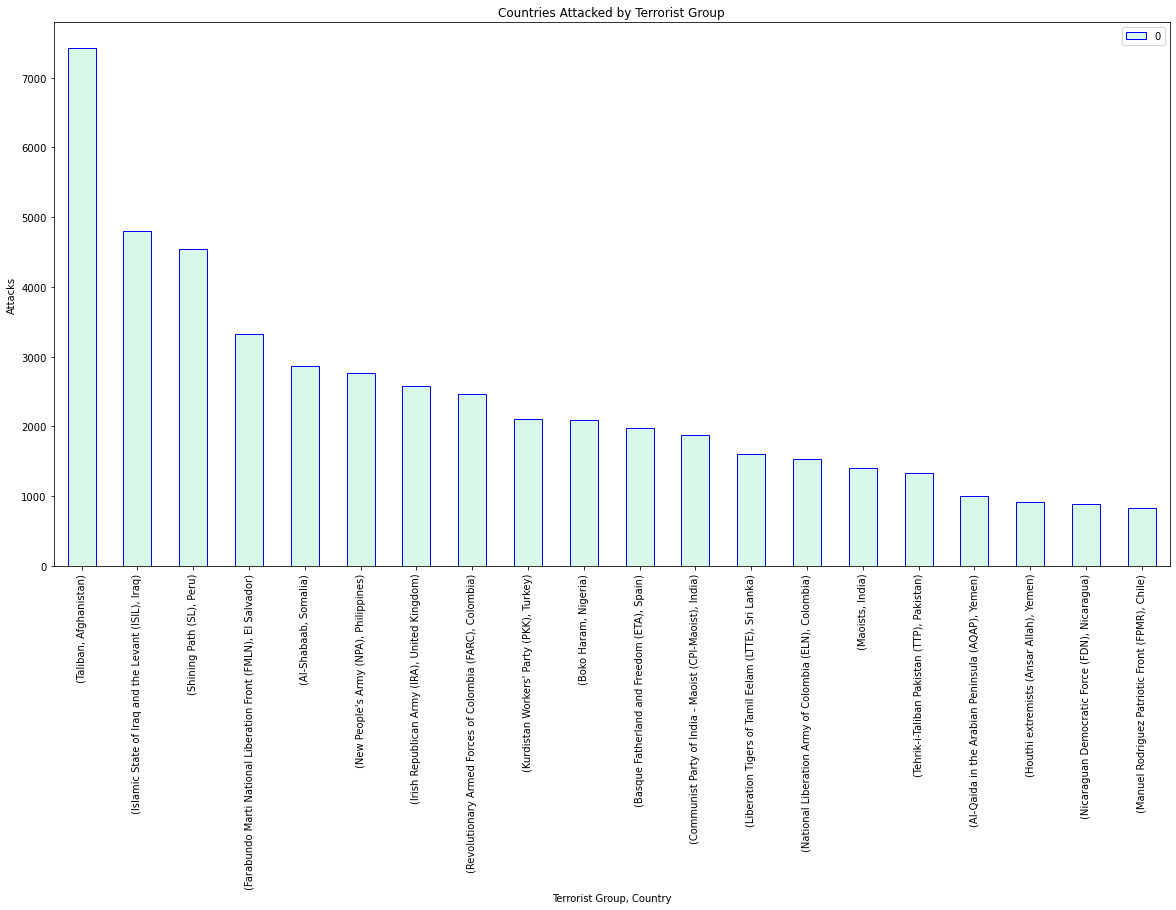

In [272]:
df[["Group Name", "Country"]].value_counts().drop("Unknown").to_frame().head(20).plot.bar(figsize=(20,10),color=(0.5,0.9,0.7,0.3),edgecolor='blue')
plt.title("Countries Attacked by Terrorist Group")
plt.xlabel("Terrorist Group, Country")
plt.ylabel("Attacks")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

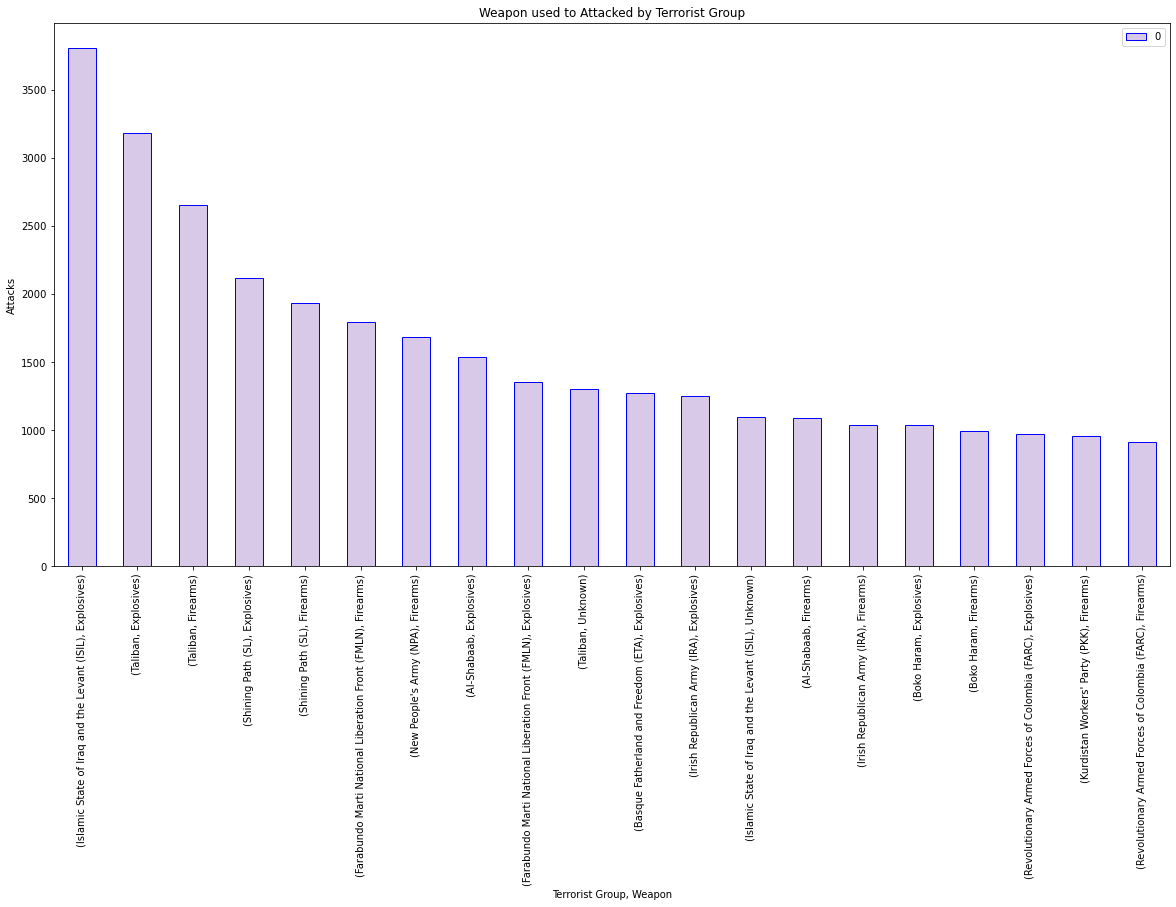

In [278]:
df[["Group Name", "Weapon Type"]].value_counts().drop("Unknown").to_frame().head(20).plot.bar(figsize=(20,10),color=(0.5,0.3,0.7,0.3),edgecolor='blue')
plt.title("Weapon used to Attacked by Terrorist Group")
plt.xlabel("Terrorist Group, Weapon")
plt.ylabel("Attacks")
plt.show

In [273]:
#calculate no.of Casualty over th world
df.loc[:, "Casualty"].sum()

935737.0

In [274]:
#calculate no.of Killed over th world
df.loc[:, "Killed"].sum()

411868.0

In [275]:
#calculate no.of Wounded over th world
df.loc[:, "Wounded"].sum()

523869.0

# Of course, we remind you that America and Israel are the first responsible for terrorism in the world, and we do not forget what America did to our brothers in Afghanistan and what Israel is doing to our brothers in occupied Palestine, and they do not do justice to terrorism! ( 😅 )  LOL